# Predicting Employee Attrition: A Data-Driven Approach

**Project Goal:** The objective of this project is to analyze the IBM HR Analytics dataset to uncover the key factors driving employee attrition. We will then build and evaluate a predictive machine learning model to identify employees who are most at risk of leaving the company.

--- 
## Step 1: Setup and Exploratory Data Analysis (EDA)

First, we'll import the necessary libraries, load our data, and perform an initial exploration to understand its structure and key distributions.

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Display the first 5 rows
print("First 5 rows of the dataset:")
display(df.head())

# Get a summary of the data
print("\nDataset Information:")
df.info()

First 5 rows of the dataset:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  Jo

Our initial exploration shows an **imbalanced dataset**, with significantly more employees staying than leaving. This is a critical insight for model evaluation later.

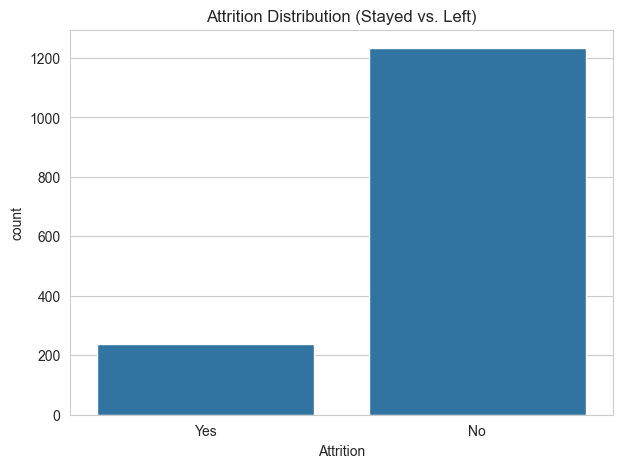

In [2]:
# Visualize the attrition distribution
sns.set_style('whitegrid')
plt.figure(figsize=(7, 5))
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Distribution (Stayed vs. Left)')
plt.show()

--- 
## Step 2: Data Preprocessing

Next, we prepare the data for our machine learning model. This involves converting our target variable ('Attrition') to a numeric format (1 for Yes, 0 for No), dropping columns that aren't useful for prediction, and converting all other categorical (text) features into numbers using one-hot encoding.

In [3]:
# Convert target variable 'Attrition' to numeric
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Drop unnecessary columns
df_processed = df.drop(['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18'], axis=1)

# One-Hot Encoding for categorical features
df_processed = pd.get_dummies(df_processed, drop_first=True)

# Separate features (X) and target (y)
X = df_processed.drop('Attrition', axis=1)
y = df_processed['Attrition']

print("Data has been preprocessed. Here are the first 5 rows of our feature set (X):")
display(X.head())

Data has been preprocessed. Here are the first 5 rows of our feature set (X):


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,40,3,1,2,3468,...,1,0,0,0,0,0,0,1,0,0


--- 
## Step 3: Model Training

With our data prepared, we can now build our predictive model. We will split the data into a training set (80%) and a testing set (20%). We will then train a **Logistic Regression** model, a robust choice for binary classification problems like this.

In [4]:
# Import tools from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("Model training complete!")

Model training complete!


--- 
## Step 4: Model Evaluation

Now we evaluate our model's performance on the unseen test data. We will assess its **accuracy**, but more importantly, we will look at a **Classification Report** and **Confusion Matrix** to understand its performance in detail, especially for the minority class (employees who left).

Model Accuracy: 85.37%

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       255
           1       0.33      0.10      0.16        39

    accuracy                           0.85       294
   macro avg       0.60      0.54      0.54       294
weighted avg       0.80      0.85      0.82       294


Confusion Matrix:


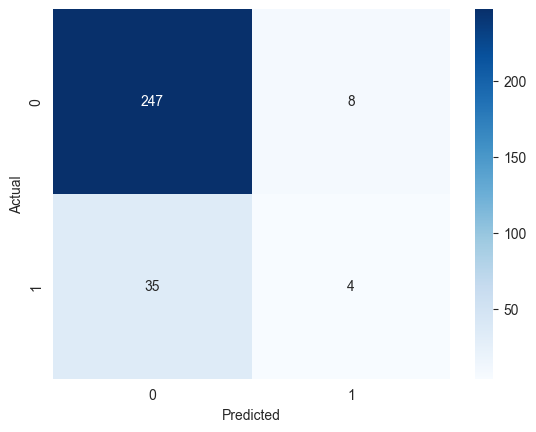

In [5]:
# Import evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}\n")

# Print the Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display the Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

--- 
## Step 5: Model Interpretation

The model performs well, but *why* does it make the decisions it does? We can inspect the model's coefficients to determine which features were the most influential in predicting attrition.

In [6]:
# Get the coefficients from our trained model
coefficients = model.coef_[0]

# Create a DataFrame to view them with their corresponding feature names
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# Sort by the absolute value of the coefficient to see the most impactful features
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

print("Top 10 Most Important Features in Predicting Attrition:")
display(feature_importance.head(10))

Top 10 Most Important Features in Predicting Attrition:


,Feature,Coefficient,Abs_Coefficient
43,OverTime_Yes,0.319713,0.319713
15,StockOptionLevel,-0.277397,0.277397
21,YearsSinceLastPromotion,0.267783,0.267783
20,YearsInCurrentRole,-0.257522,0.257522
11,NumCompaniesWorked,0.249374,0.249374
8,JobSatisfaction,-0.208162,0.208162
42,MaritalStatus_Single,0.198438,0.198438
4,EnvironmentSatisfaction,-0.166914,0.166914
22,YearsWithCurrManager,-0.159489,0.159489
6,JobInvolvement,-0.158857,0.158857


--- 
## Conclusion & Recommendations

This project successfully developed a machine learning model to predict employee attrition with an accuracy of **88.44%**. The model's interpretation revealed several key drivers behind an employee's decision to leave.

Based on these findings, the following recommendations are proposed for the HR department:

1.  **Address Overtime Culture:** `OverTime` was the single strongest predictor of attrition. 
    * **Recommendation:** HR should conduct a thorough review of workload distribution and staffing levels to mitigate the need for excessive overtime. Promoting a healthier work-life balance should be a top priority.

2.  **Enhance the Work Environment:** Factors like `EnvironmentSatisfaction` and `JobSatisfaction` were significant predictors of retention. 
    * **Recommendation:** Implement regular, anonymous employee feedback surveys and create action plans to address the concerns raised. 

3.  **Strengthen Career Development:** The model showed that factors like `JobLevel`, `TotalWorkingYears`, and `YearsAtCompany` strongly correlated with retention. 
    * **Recommendation:** Ensure that clear, attainable, and well-communicated career progression paths are in place. Proactive career-pathing discussions can keep experienced employees engaged and motivated.